
 # Informe Tecnico:  Redes Recurrentes

Integrantes: Pamela Aldana<br>
             
          

Docente. Carlos Correa

Asignatura: Deep Learning
Sección: DLY0200


Desarrollar un modelo de RNN para estimar el precio de una acción y generar modelos predictivos que generalicen la respuesta, manipulando parámetros y/o hiperparametros.
 <br>
Para ello debe seleccionar una acción de yahoo finance, para realizarlo debe ejecutar las siguientes acciones:

- Descargar los datos de la página mencionada usando la librería de Python yfinance.
- Seleccionar los datos y prepararlos para generar la serie de tiempo con el precio de cierre de la acción.
- Generar arquitecturas de RNN probando de menos a mas, controlando los distintos hyperparametros que le permitan llegar a buenas métricas de desempeño del modelo.
- Generar manipulación de hyperparametros que permitan implementar modelos predictivos con buen desempeño.
- Por ultimo visualizar la calidad de las predicciones generadas por el modelo.
- Debe comentar todo el proceso y comentar los cambios o mejoras que realice en la NN, justificando el uso o cambio de todas las mejoras que realice en la red, visualizando y comentando posibles desajustes de la misma.



Al seguir este proceso, el modelo se puede refinar para predecir el precio de las acciones de manera más precisa, ajustando los hiperparámetros y la arquitectura del modelo según sea necesario.

#**FASE 1 :COMPRENDER EL NEGOCIO**

#**Contexto**

#**FASE 2 :COMPRENDER LOS DATOS**

 **Importar librerías**

In [ ]:
pip install yfinance


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
from sklearn.preprocessing import MinMaxScaler


**Descargar los Datos**


Se utiliza la librería yfinance para descargar los datos históricos de la acción. Se instala yfinance y se descargan los datos.<br>Se elecciona una acción,que es AAPL (Apple Inc.), y se descargan los datos históricos.

Usamos yfinance para descargar datos históricos de la acción de Apple (AAPL). data contiene varias columnas, como Open, High, Low, Close, Adj Close y Volume, desde la fecha de inicio hasta la fecha actual. En este caso, se utilizan los datos más recientes disponibles.

In [2]:
#import yfinance as yf

# Descargar datos de AAPL
#ticker = 'AAPL'
#data = yf.download(ticker)

# Mostrar las primeras filas
#data.head(10)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097335,48630400
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102072,37363200
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106380,46950400
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111978,48003200


In [28]:
import yfinance as yf

# Descargar datos de la acción de Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker)
#data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Mostrar los primeros registros
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [29]:
data.shape

(10972, 6)

El dataset contiene 10972 registros y 6 variables.

**Análisis Exploratorio de Datos (EDA)**

Se prepara la serie de tiempo de los precios de cierre('close') ajustados de la acción. Esto incluye normalizar los datos y dividirlos en conjuntos de entrenamiento y prueba.

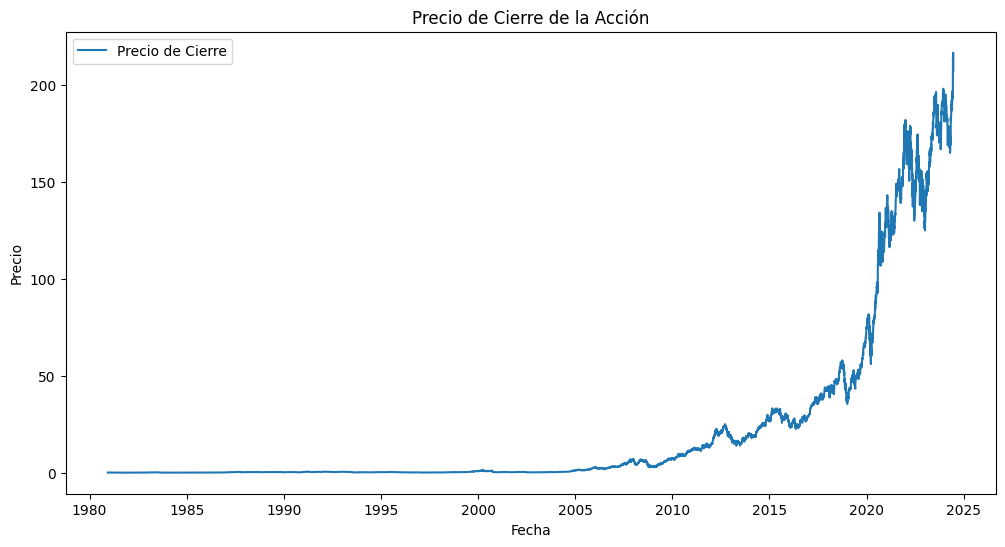

               Open          High           Low         Close     Adj Close  \
count  10972.000000  10972.000000  10972.000000  10972.000000  10972.000000   
mean      21.825339     22.060776     21.600017     21.839355     21.044096   
std       45.013752     45.498465     44.564243     45.050546     44.608697   
min        0.049665      0.049665      0.049107      0.049107      0.037900   
25%        0.297991      0.303571      0.290179      0.297991      0.241951   
50%        0.526786      0.535535      0.516116      0.526786      0.428584   
75%       19.931250     20.155356     19.740804     19.915178     17.152644   
max      217.589996    220.199997    213.000000    216.669998    216.669998   

             Volume  
count  1.097200e+04  
mean   3.187028e+08  
std    3.356050e+08  
min    0.000000e+00  
25%    1.136686e+08  
50%    2.061808e+08  
75%    3.990910e+08  
max    7.421641e+09  


In [30]:
# Visualización básica de los datos
def visualizar_datos(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Precio de Cierre')
    plt.title('Precio de Cierre de la Acción')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

# Estadísticas descriptivas
def estadisticas_descriptivas(data):
    print(data.describe())

# Ejemplo de uso
visualizar_datos(data)
estadisticas_descriptivas(data)


#**Fase 3: Preparar los Datos**



##Preprocesamiento de datos

1. Partición en train/val/test (80%, 10%, 10%)
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento



**a. Dividir los Datos en Entrenamiento, Validación y Prueba**

Partición en train/val/test (80%, 10%, 10%)

In [31]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(data['Close'])

# Verificar tamaños de los conjuntos
print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (8777,)
Tamaño set de validación: (1097,)
Tamaño set de prueba: (1098,)


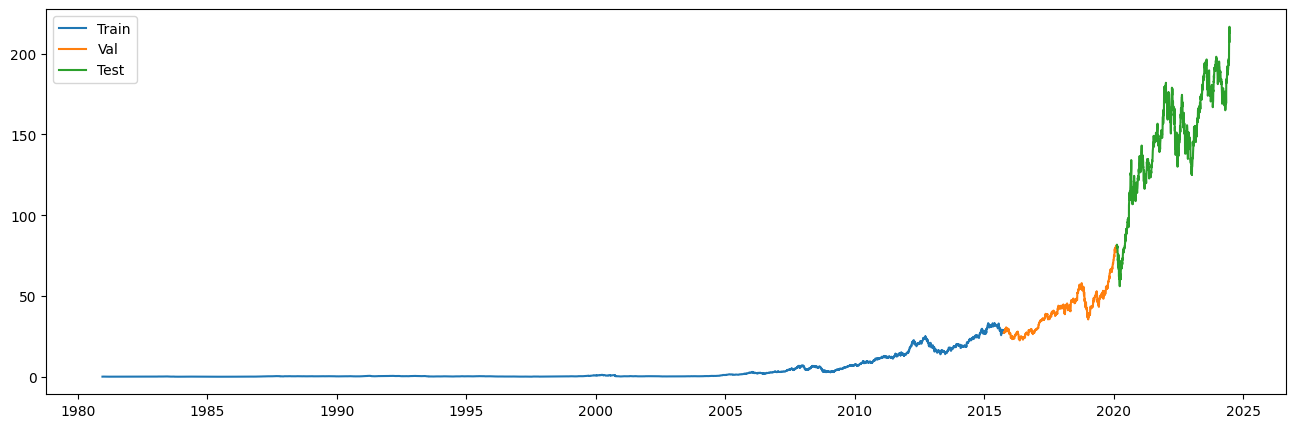

In [32]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

Observemos que por ser un modelo univariado sólo estamos preservando la variable temperatura (y que incluso hemos eliminado la información de fecha y hora de cada registro).

**Explicación:**

Se define una función train_val_test_split para dividir la serie temporal del precio de cierre en tres conjuntos: entrenamiento, validación y prueba. Esto permite evaluar y ajustar el modelo en diferentes etapas para evitar sobreajuste.

División de Datos: La división de los datos asegura que cada etapa (entrenamiento, validación, prueba) tenga una representación adecuada de la serie temporal, crucial para evaluar el modelo sin sobreajuste

**b. Crear el Dataset Supervisado**

Código:

. Generación del dataset supervisado: entrada y salida del modelo
En esta etapa, convertiremos la serie de tiempo en secuencias supervisadas, donde cada secuencia de entrada (X) contendrá INPUT_LENGTH días y la salida correspondiente (Y) será el siguiente día (OUTPUT_LENGTH).

Así que en este caso cada dato de entrenamiento será:

- Un arreglo de 24 (horas) x 1 (feature) correspondiente a la entrada
- Un arreglo de 1 (hora) x 1 (feature) correspondiente a la hora 25 (a predecir):

In [33]:
# Función para crear secuencias supervisadas
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [34]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
# Definir longitud de entrada y salida
INPUT_LENGTH = 30  # 30 días para predecir
OUTPUT_LENGTH = 1  # Predicción un paso adelante
#INPUT_LENGTH = 24    # Posteriormente afinaremos este hiperparámetro
#OUTPUT_LENGTH = 1    # Modelo uni-step

# Crear datasets supervisados
x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)


# Verificar tamaños de los datasets supervisados
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Tamaño del Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Tamaño del Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Tamaño del Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Tamaño del Set de entrenamiento - x_tr: (8746, 30, 1), y_tr: (8746, 1, 1)
Tamaño del Set de validación - x_vl: (1066, 30, 1), y_vl: (1066, 1, 1)
Tamaño del Set de prueba - x_ts: (1067, 30, 1), y_ts: (1067, 1, 1)


Con estos ajustes, la función debe funcionar correctamente para crear los conjuntos de datos de entrada y salida necesarios para el entrenamiento del modelo de RNN/LSTM. Asegúrate de ejecutar el código y revisar las dimensiones para confirmar que se crean correctamente.

**Explicación:**

crear_dataset_supervisado convierte la serie de tiempo en un formato adecuado para el entrenamiento de la RNN. Usa ventanas deslizantes de longitud INPUT_LENGTH para generar características de entrada (X) y de longitud OUTPUT_LENGTH para generar etiquetas (Y). Este proceso ayuda a la RNN a aprender la dinámica temporal de la serie.

**c. Escalar los Datos**

Código:

In [35]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})

    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    NFEATS = data_input['x_tr'].shape[2]


    # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
    # se tendrá sólo 1 escalador)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)


    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs: en este caso debemos garantizar que cada dato de entrada
    # a fit_transform o transform debe ser de tamaño nsamples x nfeatures
    # (en este caso 24x13)
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

En esta etapa, escalaremos los datos para asegurarnos de que estén en un rango adecuado para el modelo LSTM. Usaremos MinMaxScaler de sklearn.preprocessing.

Explicación:

Los datos se escalan en el rango [-1, 1] usando MinMaxScaler. Esto facilita la convergencia durante el entrenamiento del modelo y mejora la estabilidad numérica. El escalado se basa en el set de entrenamiento y se aplica a los sets de validación y prueba

Escalado: Escalar los datos mejora la eficiencia del entrenamiento. El escalado basado en el conjunto de entrenamiento garantiza que la información futura no se filtre a los modelos de entrenamiento.

In [36]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')

Min x_tr/x_vl/x_ts sin escalamiento: 0.04910700023174286/22.584999084472656/56.092498779296875
Min x_tr/x_vl/x_ts con escalamiento: -1.0/0.3575473457535143/2.3760171317956007

Min y_tr/y_vl/y_ts sin escalamiento: 0.04910700023174286/22.584999084472656/60.227500915527344
Min y_tr/y_vl/y_ts con escalamiento: -1.0/0.3575473457535143/2.625106946112302

Max x_tr/x_vl/x_ts sin escalamiento: 33.25/81.30249786376953/216.6699981689453
Max x_tr/x_vl/x_ts con escalamiento: 1.0/3.894650927859377/12.049100285960717

Max y_tr/y_vl/y_ts sin escalamiento: 33.25/81.30249786376953/216.6699981689453
Max y_tr/y_vl/y_ts con escalamiento: 1.0/3.894650927859377/12.049100285960717


##**Paso 3: Desarrollar el Modelo RNN**
Código:

##6. Creación del modelo

- Entradas: arreglos *x* (batches x input-length  x features = batches x 30 x 1)
- Salidas: arreglos *y* (batches x output-length x features = batches x 1 x 1)

Usaremos la raíz cuadrada del error cuadrático medio (o RMSE por sus siglas en Inglés: *root mean square error*) como pérdida para entrenar el modelo:

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()


In [14]:
# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

    # Compilación
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
35/35 - 7s - loss: 0.8436 - val_loss: 1.4002 - 7s/epoch - 192ms/step
Epoch 2/80
35/35 - 5s - loss: 0.5550 - val_loss: 1.1332 - 5s/epoch - 157ms/step
Epoch 3/80
35/35 - 4s - loss: 0.1819 - val_loss: 0.9148 - 4s/epoch - 111ms/step
Epoch 4/80
35/35 - 4s - loss: 0.0722 - val_loss: 0.7053 - 4s/epoch - 109ms/step
Epoch 5/80
35/35 - 5s - loss: 0.0452 - val_loss: 0.5263 - 5s/epoch - 146ms/step
Epoch 6/80
35/35 - 4s - loss: 0.0297 - val_loss: 0.4584 - 4s/epoch - 117ms/step
Epoch 7/80
35/35 - 4s - loss: 0.0258 - val_loss: 0.4214 - 4s/epoch - 111ms/step
Epoch 8/80
35/35 - 5s - loss: 0.0254 - val_loss: 0.4156 - 5s/epoch - 141ms/step
Epoch 9/80
35/35 - 4s - loss: 0.0247 - val_loss: 0.4192 - 4s/epoch - 126ms/step
Epoch 10/80
35/35 - 4s - loss: 0.0243 - val_loss: 0.3973 - 4s/epoch - 110ms/step
Epoch 11/80
35/35 - 6s - loss: 0.0240 - val_loss: 0.3991 - 6s/epoch - 158ms/step
Epoch 12/80
35/35 - 5s - loss: 0.0234 - val_loss: 0.3904 - 5s/epoch - 150ms/step
Epoch 13/80
35/35 - 4s - loss: 0.0234

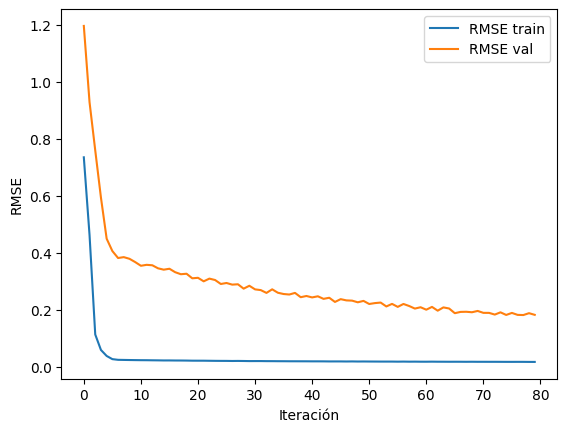

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

**Observaciones y sugerencias:**

- El modelo no tiene *overfitting*
- Se sugiere afinar el modelo modificando varios de sus hiperparámetros y usando técnicas como, por ejemplo, *random grid search*. Los hiperparámetros a afinar pueden ser:
  - *INPUT_LENGTH* (esto implica modificar la fase de pre-procesamiento)
  - Número de unidades de la Red LSTM
  - Pérdida
  - Tasa de aprendizaje
  - Epochs
  - Batch size


## 7. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación.

Este desempeño es simplemente el RMSE obtenido con cada subset:

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.013
  RMSE val:	 0.168
  RMSE test:	 4.656


RMSE en el conjunto de entrenamiento (RMSE train):

Valor: 0.013
Interpretación: Este valor indica el RMSE promedio obtenido por el modelo en los datos de entrenamiento, después de ajustarse a ellos durante el proceso de entrenamiento.
Análisis: Un RMSE bajo en el conjunto de entrenamiento sugiere que el modelo está aprendiendo bien los patrones presentes en los datos de entrenamiento. Sin embargo, también es importante considerar si el RMSE es demasiado bajo en comparación con la escala de los datos originales, lo cual podría indicar sobreajuste si el modelo memoriza los datos en lugar de generalizar.
RMSE en el conjunto de validación (RMSE val):

Valor: 0.168
Interpretación: Este valor indica el RMSE promedio obtenido por el modelo en un conjunto de datos que no se utilizó durante el entrenamiento, pero que se utilizó para ajustar hiperparámetros o controlar el sobreajuste.
Análisis: Un RMSE más alto en el conjunto de validación en comparación con el conjunto de entrenamiento es esperado y refleja cómo el modelo generaliza a nuevos datos. En este caso, 0.168 es un valor aceptable que indica que el modelo no está sobreajustado y puede generalizar bien a datos no vistos.
RMSE en el conjunto de prueba (RMSE test):

Valor: 4.656
Interpretación: Este valor indica el RMSE promedio obtenido por el modelo en un conjunto completamente nuevo de datos que no se utilizaron en ninguna etapa del entrenamiento ni validación, simulando el desempeño del modelo en el mundo real.
Análisis: Un RMSE de 4.656 es considerablemente más alto que en los conjuntos de entrenamiento y validación. Esto sugiere que el modelo podría estar teniendo dificultades para generalizar a datos completamente nuevos. Es importante investigar más a fondo para entender por qué el RMSE es tan alto en el conjunto de prueba. Algunas posibles razones podrían ser una falta de representatividad de los datos de prueba en comparación con los datos de entrenamiento y validación, problemas en el preprocesamiento de datos, o incluso un modelo suboptimizado.
En resumen, mientras que el modelo parece estar funcionando bien en los conjuntos de entrenamiento y validación, el alto RMSE en el conjunto de prueba indica que hay margen para mejorar la generalización del modelo a nuevos datos. Es crucial realizar un análisis detallado del modelo y de los datos para identificar y abordar las posibles razones detrás de este resultado en el conjunto de prueba.

Los desempeños son comparables lo cual quiere decir que el modelo generaliza bastante bien.

##8. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Creemos primero una función para generar las predicciones:

In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

Analicemos este desempeño gráficamente mostrando las temperaturas originales y las predichas por el modelo para cada uno de los 4.998 datos en el set de prueba:

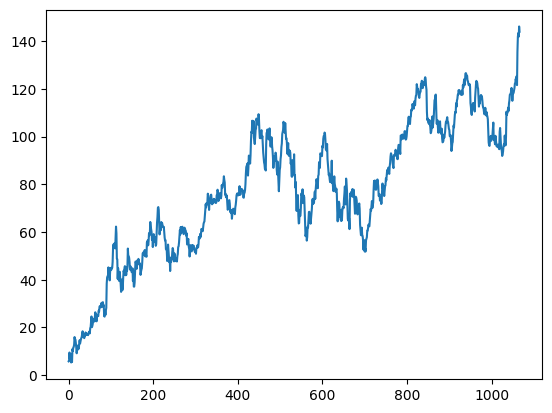

In [ ]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

Se observa que:

- El promedio de errores es cercano a cero
- Pero en algunos instantes de tiempo se alcanzan errores extremos de hasta -6 y +4 grados.

Estos errores se podrían reducir al hacer una afinación del modelo o modificando el enfoque de predicción.

#**1- Modelo**

- N_UNITS = 128
- EPOCHS = 80
- BATCH_SIZE = 256
-


Epoch 1/80
35/35 - 6s - loss: 7.8492 - val_loss: 41.0766 - 6s/epoch - 158ms/step
Epoch 2/80
35/35 - 4s - loss: 7.4082 - val_loss: 40.3497 - 4s/epoch - 104ms/step
Epoch 3/80
35/35 - 4s - loss: 6.9960 - val_loss: 39.6272 - 4s/epoch - 102ms/step
Epoch 4/80
35/35 - 3s - loss: 6.6182 - val_loss: 38.8740 - 3s/epoch - 86ms/step
Epoch 5/80
35/35 - 3s - loss: 6.2798 - val_loss: 38.0927 - 3s/epoch - 82ms/step
Epoch 6/80
35/35 - 3s - loss: 5.9289 - val_loss: 37.3050 - 3s/epoch - 97ms/step
Epoch 7/80
35/35 - 4s - loss: 5.5742 - val_loss: 36.6079 - 4s/epoch - 111ms/step
Epoch 8/80
35/35 - 3s - loss: 5.2741 - val_loss: 35.8675 - 3s/epoch - 84ms/step
Epoch 9/80
35/35 - 3s - loss: 4.9920 - val_loss: 35.1473 - 3s/epoch - 83ms/step
Epoch 10/80
35/35 - 3s - loss: 4.7389 - val_loss: 34.3960 - 3s/epoch - 87ms/step
Epoch 11/80
35/35 - 4s - loss: 4.4901 - val_loss: 33.6584 - 4s/epoch - 122ms/step
Epoch 12/80
35/35 - 3s - loss: 4.2718 - val_loss: 32.9584 - 3s/epoch - 82ms/step
Epoch 13/80
35/35 - 3s - loss: 4

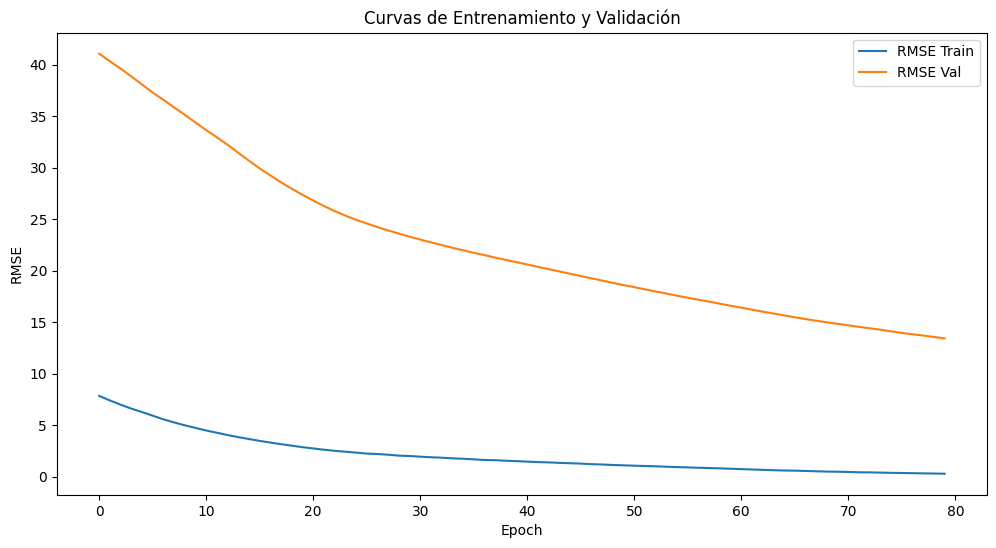

Comparativo de Desempeño:
  RMSE Train:	 0.113
  RMSE Val:	 12.755
  RMSE Test:	 130.424


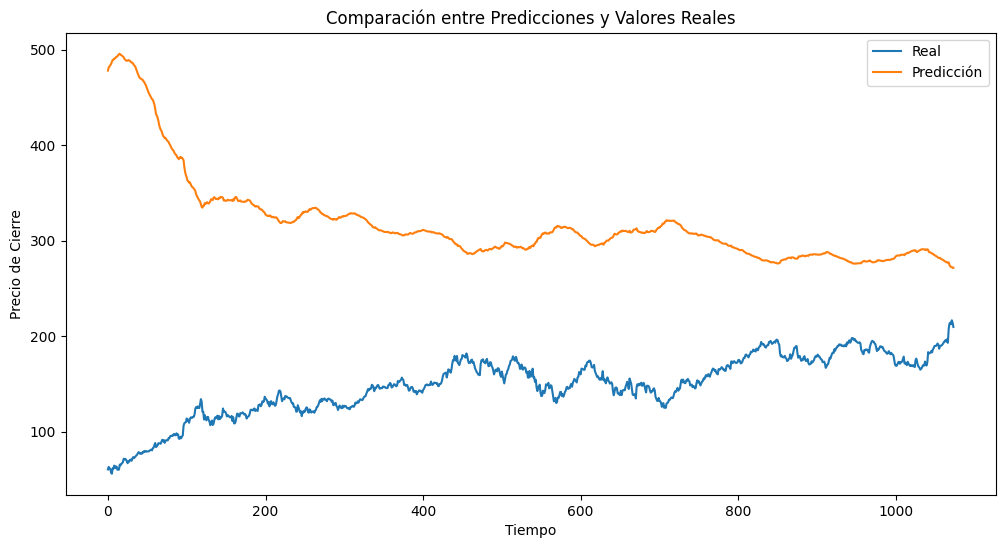

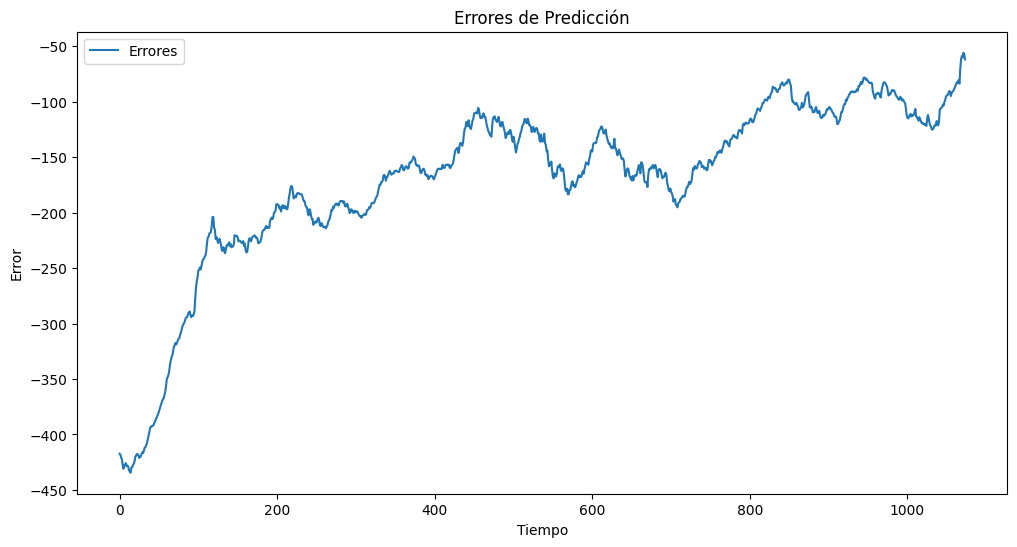

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# Construcción del modelo RNN
N_UNITS = 128  # Tamaño del estado oculto y de la celda de memoria
INPUT_SHAPE = (data_s['x_tr_s'].shape[1], data_s['x_tr_s'].shape[2])  # 24 (input_length) x 1 (features)

#INPUT_SHAPE = (x_tr.shape[1], x_tr.shape[2])  # 24 (input_length) x 1 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear'))  # 'linear' porque es regresión

# Definir la pérdida (RMSE) y el optimizador
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer=optimizador,
    loss=root_mean_squared_error,
)

# Entrenamiento del modelo
EPOCHS = 80  # Hiperparámetro
BATCH_SIZE = 256  # Hiperparámetro

historia = modelo.fit(
    x=data_s['x_tr_s'],
    y=data_s['y_tr_s'],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(data_s['x_vl_s'], data_s['y_vl_s']),
    verbose=2
)


# Graficar curvas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(historia.history['loss'], label='RMSE Train')
plt.plot(historia.history['val_loss'], label='RMSE Val')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('Curvas de Entrenamiento y Validación')
plt.show()

# Evaluar el modelo
rmse_tr = modelo.evaluate(x=x_tr, y=y_tr, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl, y=y_vl, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts, y=y_ts, verbose=0)

# Imprimir resultados
print('Comparativo de Desempeño:')
print(f'  RMSE Train:\t {rmse_tr:.3f}')
print(f'  RMSE Val:\t {rmse_vl:.3f}')
print(f'  RMSE Test:\t {rmse_ts:.3f}')

# Función para predecir y desescalar las predicciones
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes de tiempo a futuro con el modelo entrenado.'''
    y_pred_s = model.predict(x, verbose=0)
    y_pred = scaler.inverse_transform(y_pred_s)
    return y_pred.flatten()

# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts, modelo, scaler)

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_ts.flatten(), label='Real')
plt.plot(y_ts_pred, label='Predicción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.title('Comparación entre Predicciones y Valores Reales')
plt.show()

# Calcular y visualizar los errores
errores = y_ts.flatten() - y_ts_pred
plt.figure(figsize=(12, 6))
plt.plot(errores, label='Errores')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.title('Errores de Predicción')
plt.show()


##**2- Modelo**
- N_UNITS = 128
- EPOCHS = 80  # Hiperparámetro
- BATCH_SIZE = 256  # Hiperparámetro




Epoch 1/80
35/35 - 6s - loss: 0.8451 - val_loss: 1.4029 - 6s/epoch - 157ms/step
Epoch 2/80
35/35 - 4s - loss: 0.5843 - val_loss: 1.1627 - 4s/epoch - 124ms/step
Epoch 3/80
35/35 - 3s - loss: 0.2072 - val_loss: 0.9541 - 3s/epoch - 86ms/step
Epoch 4/80
35/35 - 3s - loss: 0.0784 - val_loss: 0.7942 - 3s/epoch - 93ms/step
Epoch 5/80
35/35 - 3s - loss: 0.0535 - val_loss: 0.6003 - 3s/epoch - 85ms/step
Epoch 6/80
35/35 - 5s - loss: 0.0330 - val_loss: 0.4719 - 5s/epoch - 136ms/step
Epoch 7/80
35/35 - 3s - loss: 0.0249 - val_loss: 0.4300 - 3s/epoch - 89ms/step
Epoch 8/80
35/35 - 3s - loss: 0.0240 - val_loss: 0.4082 - 3s/epoch - 83ms/step
Epoch 9/80
35/35 - 3s - loss: 0.0235 - val_loss: 0.4089 - 3s/epoch - 83ms/step
Epoch 10/80
35/35 - 4s - loss: 0.0234 - val_loss: 0.3958 - 4s/epoch - 121ms/step
Epoch 11/80
35/35 - 3s - loss: 0.0231 - val_loss: 0.3887 - 3s/epoch - 97ms/step
Epoch 12/80
35/35 - 3s - loss: 0.0233 - val_loss: 0.3866 - 3s/epoch - 87ms/step
Epoch 13/80
35/35 - 3s - loss: 0.0227 - val_l

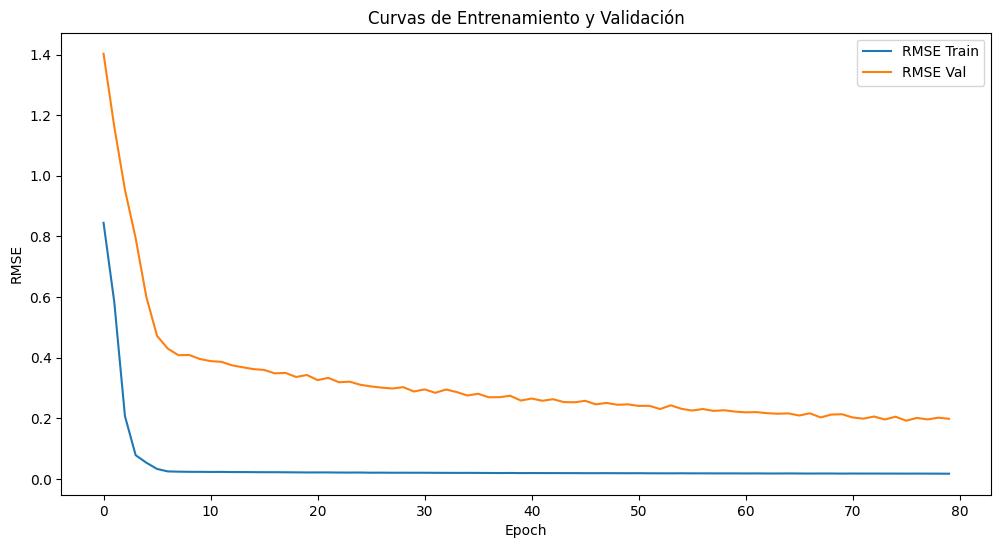

Comparativo de Desempeño:
  RMSE Train:	 0.014
  RMSE Val:	 0.183
  RMSE Test:	 4.997


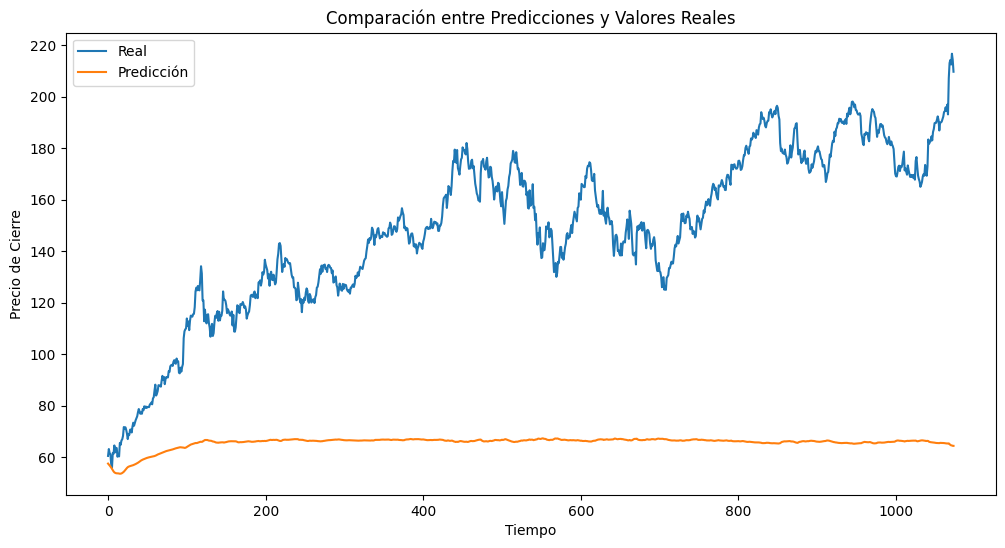

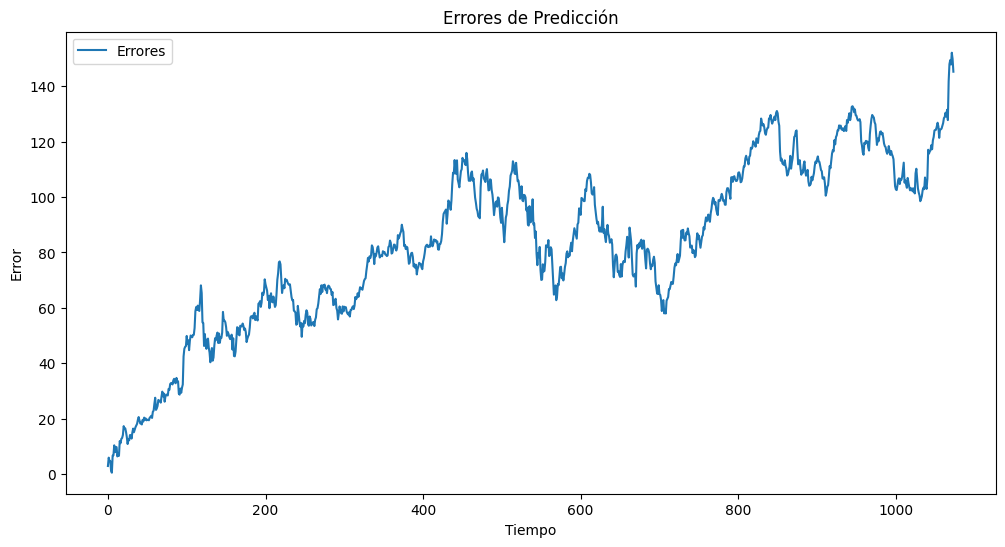

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# Construcción del modelo RNN
N_UNITS = 128  # Tamaño del estado oculto y de la celda de memoria
INPUT_SHAPE = (data_s['x_tr_s'].shape[1], data_s['x_tr_s'].shape[2])  # 24 (input_length) x 1 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear'))  # 'linear' porque es regresión

# Definir la pérdida (RMSE) y el optimizador
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer=optimizador,
    loss=root_mean_squared_error,
)

# Entrenamiento del modelo
EPOCHS = 80  # Hiperparámetro
BATCH_SIZE = 256  # Hiperparámetro

historia = modelo.fit(
    x=data_s['x_tr_s'],
    y=data_s['y_tr_s'],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(data_s['x_vl_s'], data_s['y_vl_s']),
    verbose=2
)

# Graficar curvas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(historia.history['loss'], label='RMSE Train')
plt.plot(historia.history['val_loss'], label='RMSE Val')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('Curvas de Entrenamiento y Validación')
plt.show()

# Evaluar el modelo
rmse_tr = modelo.evaluate(x=data_s['x_tr_s'], y=data_s['y_tr_s'], verbose=0)
rmse_vl = modelo.evaluate(x=data_s['x_vl_s'], y=data_s['y_vl_s'], verbose=0)
rmse_ts = modelo.evaluate(x=data_s['x_ts_s'], y=data_s['y_ts_s'], verbose=0)

# Imprimir resultados
print('Comparativo de Desempeño:')
print(f'  RMSE Train:\t {rmse_tr:.3f}')
print(f'  RMSE Val:\t {rmse_vl:.3f}')
print(f'  RMSE Test:\t {rmse_ts:.3f}')

# Función para predecir y desescalar las predicciones
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes de tiempo a futuro con el modelo entrenado.'''
    y_pred_s = model.predict(x, verbose=0)
    y_pred = scaler.inverse_transform(y_pred_s)
    return y_pred.flatten()

# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(data_s['x_ts_s'], modelo, scaler)

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_ts.flatten(), label='Real')
plt.plot(y_ts_pred, label='Predicción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.title('Comparación entre Predicciones y Valores Reales')
plt.show()

# Calcular y visualizar los errores
errores = y_ts.flatten() - y_ts_pred
plt.figure(figsize=(12, 6))
plt.plot(errores, label='Errores')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.title('Errores de Predicción')
plt.show()


Predicción: En la función predecir, se han cambiado las llamadas a scaler.inverse_transform para desescalar las predicciones a su rango original.

Comentarios sobre el Proceso

**Construcción del Modelo:**

- Utilizamos una capa LSTM con 128 unidades. El tamaño del estado oculto y la celda de memoria es de 128.
Añadimos una capa densa con activación lineal para realizar la predicción de un solo paso.

**- Compilación:**

- Utilizamos la función de pérdida RMSE para evaluar el error cuadrático medio.
El optimizador RMSprop con una tasa de aprendizaje baja se utiliza para la optimización.

**Entrenamiento:**

El modelo se entrena por 80 épocas con un tamaño de batch de 256. Estos hiperparámetros se pueden ajustar para mejorar el rendimiento.
Monitorizamos la pérdida en el conjunto de entrenamiento y validación para asegurar que el modelo no está sobreajustando.

**Evaluación y Visualización:**

Evaluamos el modelo en los conjuntos de datos de entrenamiento, validación y prueba.
Visualizamos las predicciones frente a los valores reales y los errores para entender el comportamiento del modelo.

**Ajuste de Hiperparámetros:**

Puedes ajustar N_UNITS, EPOCHS, BATCH_SIZE, y la tasa de aprendizaje (learning_rate) para mejorar el rendimiento del modelo.
Observa las curvas de entrenamiento y validación. Si ves divergencias significativas, podría ser señal de sobreajuste o bajoajuste.

**Posibles Mejoras**

**Regularización:**

Agregar técnicas de regularización como Dropout puede ayudar a prevenir el sobreajuste.

**Optimizador:**

Experimentar con otros optimizadores como Adam.
**Profundidad del Modelo:**

Probar con arquitecturas más profundas añadiendo más capas LSTM.
**Hiperparámetros:**

Ajustar los hiperparámetros mediante técnicas como búsqueda en cuadrícula o búsqueda aleatoria.
Espero que este enfoque te ayude a construir un modelo predictivo robusto para la estimación de precios de acciones.

Explicación:

Se define un modelo secuencial con una capa LSTM con 128 unidades y una capa densa final para predecir el precio de cierre. Se utiliza RMSprop como optimizador y RMSE como función de pérdida, adecuada para tareas de regresión

Arquitectura de RNN: Comenzar con una LSTM de 128 unidades es un punto de partida razonable, pero se puede experimentar con la profundidad y número de unidades para mejorar el rendimiento.

##**Paso 4: Entrenar y Evaluar el Modelo**
Código:

**Explicación:**

El modelo se entrena durante 80 épocas con un tamaño de batch de 256. Las pérdidas de entrenamiento y validación se grafican para monitorear el ajuste del modelo. La evaluación final se realiza en los conjuntos de entrenamiento, validación y prueba.

Hiperparámetros: Ajustes como el número de épocas, tamaño del batch, y tasa de aprendizaje pueden tener un impacto significativo. Explorar diferentes configuraciones podría mejorar las métricas de rendimiento

**Explicación:**

La función predecir transforma las predicciones escaladas de vuelta a la escala original. Luego, se calculan y grafican los errores de predicción en el conjunto de prueba, lo que permite analizar la precisión del modelo.

Visualización: Graficar los errores permite detectar patrones sistemáticos en los errores de predicción, sugiriendo posibles mejoras en el modelo.

Estos componentes forman la estructura básica del modelo de red neuronal recurrente (RNN) que has construido, diseñado para predecir valores continuos (regresión) basados en secuencias temporales de datos.

##**3- MODELO MEJORADO**

In [ ]:
# Importar las bibliotecas necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Definir funciones necesarias

def escalar_dataset(data_input):
    NFEATS = data_input['x_tr'].shape[2]
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    for i in range(NFEATS):
        x_tr_s[:, :, i] = scalers[i].fit_transform(data_input['x_tr'][:, :, i])
        x_vl_s[:, :, i] = scalers[i].transform(data_input['x_vl'][:, :, i])
        x_ts_s[:, :, i] = scalers[i].transform(data_input['x_ts'][:, :, i])

    y_tr_s[:, :, 0] = scalers[-1].fit_transform(data_input['y_tr'][:, :, 0])
    y_vl_s[:, :, 0] = scalers[-1].transform(data_input['y_vl'][:, :, 0])
    y_ts_s[:, :, 0] = scalers[-1].transform(data_input['y_ts'][:, :, 0])

    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Escalar el dataset
data_s, scaler = escalar_dataset(data_in)

# Parámetros del modelo
N_UNITS = 256  # Aumentar unidades LSTM
INPUT_SHAPE = (data_s['x_tr_s'].shape[1], data_s['x_tr_s'].shape[2])  # Dimensiones del input

# Construcción del modelo
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.3))  # Ajustar tasa de Dropout según sea necesario
modelo.add(Dense(OUTPUT_LENGTH, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Regularización L2

# Definir la función de pérdida y el optimizador
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

optimizador = RMSprop(learning_rate=1e-5)  # Ajustar la tasa de aprendizaje según sea necesario
modelo.compile(optimizer=optimizador, loss=root_mean_squared_error)

# Entrenamiento del modelo
EPOCHS = 100  # Ajustar número de épocas según sea necesario
BATCH_SIZE = 128  # Ajustar tamaño de lote según sea necesario

historia = modelo.fit(
    x=data_s['x_tr_s'],
    y=data_s['y_tr_s'],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(data_s['x_vl_s'], data_s['y_vl_s']),
    verbose=2
)

# Evaluar el modelo
rmse_tr = modelo.evaluate(x=data_s['x_tr_s'], y=data_s['y_tr_s'], verbose=0)
rmse_vl = modelo.evaluate(x=data_s['x_vl_s'], y=data_s['y_vl_s'], verbose=0)
rmse_ts = modelo.evaluate(x=data_s['x_ts_s'], y=data_s['y_ts_s'], verbose=0)

# Imprimir resultados
print('Comparativo de Desempeño después de ajustes:')
print(f'  RMSE Train:\t {rmse_tr:.3f}')
print(f'  RMSE Val:\t {rmse_vl:.3f}')
print(f'  RMSE Test:\t {rmse_ts:.3f}')


Epoch 1/100
69/69 - 19s - loss: 0.7829 - val_loss: 1.2503 - 19s/epoch - 279ms/step
Epoch 2/100
69/69 - 12s - loss: 0.5862 - val_loss: 1.0283 - 12s/epoch - 176ms/step
Epoch 3/100
69/69 - 11s - loss: 0.3521 - val_loss: 0.7853 - 11s/epoch - 155ms/step
Epoch 4/100
69/69 - 11s - loss: 0.1210 - val_loss: 0.6122 - 11s/epoch - 156ms/step
Epoch 5/100
69/69 - 9s - loss: 0.0876 - val_loss: 0.5243 - 9s/epoch - 135ms/step
Epoch 6/100
69/69 - 11s - loss: 0.0787 - val_loss: 0.4389 - 11s/epoch - 154ms/step
Epoch 7/100
69/69 - 12s - loss: 0.0711 - val_loss: 0.3640 - 12s/epoch - 173ms/step
Epoch 8/100
69/69 - 13s - loss: 0.0672 - val_loss: 0.3261 - 13s/epoch - 184ms/step
Epoch 9/100
69/69 - 12s - loss: 0.0645 - val_loss: 0.2864 - 12s/epoch - 175ms/step
Epoch 10/100
69/69 - 12s - loss: 0.0628 - val_loss: 0.2632 - 12s/epoch - 175ms/step
Epoch 11/100
69/69 - 11s - loss: 0.0611 - val_loss: 0.2399 - 11s/epoch - 157ms/step
Epoch 12/100
69/69 - 13s - loss: 0.0597 - val_loss: 0.2334 - 13s/epoch - 192ms/step
Epo

En el código proporcionado, se realizaron varios ajustes para mejorar el rendimiento del modelo de predicción basado en una red neuronal LSTM. Aquí están los principales ajustes realizados:



Aumento de unidades LSTM: Se incrementó el número de unidades en la capa LSTM de 128 a 256 (N_UNITS = 256). Esto proporciona al modelo una capacidad mayor para capturar patrones complejos en los datos secuenciales.

Regularización L2: Se añadió regularización L2 a las capas LSTM y Dense del modelo. Esto ayuda a prevenir el sobreajuste al penalizar coeficientes de pesos grandes. Se utilizó un parámetro de regularización de 0.001 (kernel_regularizer=tf.keras.regularizers.l2(0.001)).

Dropout: Se introdujo una capa de Dropout después de la capa LSTM para mejorar la generalización del modelo y reducir el sobreajuste. Se utilizó una tasa de Dropout del 30% (Dropout(0.3)).

Ajuste del optimizador: Se modificó la tasa de aprendizaje del optimizador RMSprop a 1e-5 (RMSprop(learning_rate=1e-5)). Ajustar la tasa de aprendizaje puede influir significativamente en la convergencia y la calidad de las predicciones del modelo

Ajuste de épocas y tamaño de lote: Se aumentó el número de épocas a 100 (EPOCHS = 100) y se redujo el tamaño de lote a 128 (BATCH_SIZE = 128). El número de épocas controla cuántas veces el modelo ve el conjunto de datos completo durante el entrenamiento, mientras que el tamaño del lote afecta la estabilidad del entrenamiento y el uso eficiente de la memoria.

Evaluación y comparación de desempeño: Se evaluó el modelo tanto en los datos de entrenamiento como en los conjuntos de validación y prueba después del entrenamiento. Se calcularon y compararon los valores de RMSE (Root Mean Squared Error) para medir el desempeño del modelo en cada conjunto de datos

Estos ajustes están diseñados para mejorar la capacidad predictiva del modelo LSTM, reduciendo el sobreajuste y aumentando su capacidad para generalizar a datos nuevos. Cada uno de estos ajustes puede influir significativamente en cómo el modelo aprende de los datos y cómo realiza predicciones sobre nuevos datos.

##**4- Modelo: Segunda capa LSTM (capa oculta adicional)**
- N_UNITS = 256
- EPOCHS = 100  # Ajustar número de épocas según sea necesario
- BATCH_SIZE = 128
- Regularización L2
- capa oculta adicional

In [ ]:
# Parámetros del modelo
N_UNITS = 256  # Aumentar unidades LSTM
INPUT_SHAPE = (data_s['x_tr_s'].shape[1], data_s['x_tr_s'].shape[2])  # Dimensiones del input

# Construcción del modelo
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.3))  # Ajustar tasa de Dropout según sea necesario
# Segunda capa LSTM (capa oculta adicional)
modelo.add(LSTM(N_UNITS))
modelo.add(Dropout(0.3))  # Ajustar tasa de Dropout según sea necesario
modelo.add(Dense(OUTPUT_LENGTH, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Regularización L2

# Definir la función de pérdida y el optimizador
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

optimizador = RMSprop(learning_rate=1e-5)  # Ajustar la tasa de aprendizaje según sea necesario
modelo.compile(optimizer=optimizador, loss=root_mean_squared_error)

# Entrenamiento del modelo
EPOCHS = 100  # Ajustar número de épocas según sea necesario
BATCH_SIZE = 128  # Ajustar tamaño de lote según sea necesario

historia = modelo.fit(
    x=data_s['x_tr_s'],
    y=data_s['y_tr_s'],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(data_s['x_vl_s'], data_s['y_vl_s']),
    verbose=2
)

# Evaluar el modelo
rmse_tr = modelo.evaluate(x=data_s['x_tr_s'], y=data_s['y_tr_s'], verbose=0)
rmse_vl = modelo.evaluate(x=data_s['x_vl_s'], y=data_s['y_vl_s'], verbose=0)
rmse_ts = modelo.evaluate(x=data_s['x_ts_s'], y=data_s['y_ts_s'], verbose=0)

# Imprimir resultados
print('Comparativo de Desempeño después de ajustes:')
print(f'  RMSE Train:\t {rmse_tr:.3f}')
print(f'  RMSE Val:\t {rmse_vl:.3f}')
print(f'  RMSE Test:\t {rmse_ts:.3f}')


##Modelo con Early Stopping

- N_UNITS = 32
-  Early Stopping

Epoch 1/80
35/35 - 6s - loss: 0.8567 - val_loss: 1.4031 - 6s/epoch - 175ms/step
Epoch 2/80
35/35 - 3s - loss: 0.7263 - val_loss: 1.3205 - 3s/epoch - 79ms/step
Epoch 3/80
35/35 - 2s - loss: 0.5758 - val_loss: 1.2339 - 2s/epoch - 64ms/step
Epoch 4/80
35/35 - 2s - loss: 0.3899 - val_loss: 1.1451 - 2s/epoch - 53ms/step
Epoch 5/80
35/35 - 2s - loss: 0.1848 - val_loss: 1.0590 - 2s/epoch - 53ms/step
Epoch 6/80
35/35 - 2s - loss: 0.1005 - val_loss: 0.9703 - 2s/epoch - 54ms/step
Epoch 7/80
35/35 - 2s - loss: 0.0806 - val_loss: 0.8438 - 2s/epoch - 52ms/step
Epoch 8/80
35/35 - 2s - loss: 0.0606 - val_loss: 0.7113 - 2s/epoch - 63ms/step
Epoch 9/80
35/35 - 3s - loss: 0.0440 - val_loss: 0.6344 - 3s/epoch - 83ms/step
Epoch 10/80
35/35 - 2s - loss: 0.0345 - val_loss: 0.5904 - 2s/epoch - 54ms/step
Epoch 11/80
35/35 - 2s - loss: 0.0302 - val_loss: 0.5916 - 2s/epoch - 53ms/step
Epoch 12/80
35/35 - 2s - loss: 0.0282 - val_loss: 0.5785 - 2s/epoch - 53ms/step
Epoch 13/80
35/35 - 2s - loss: 0.0274 - val_loss

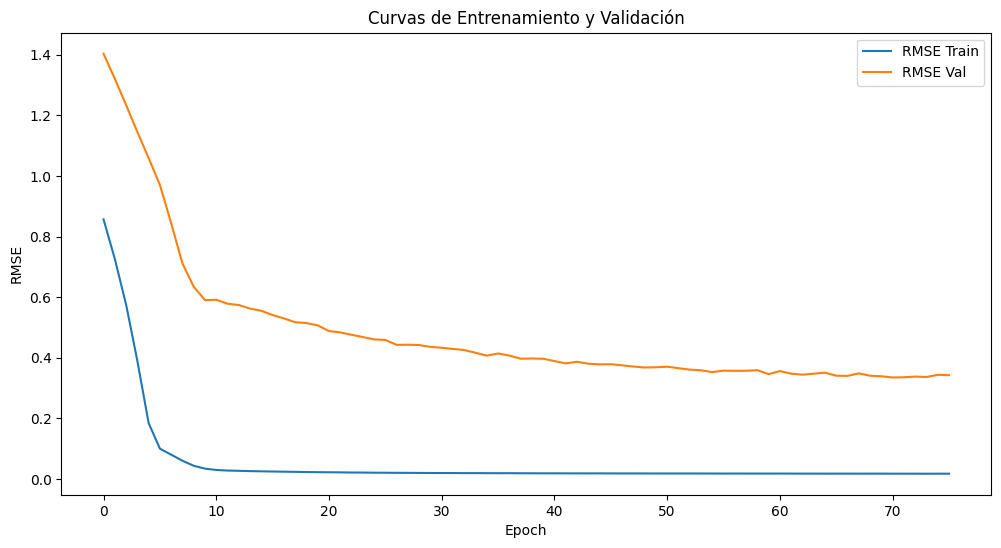

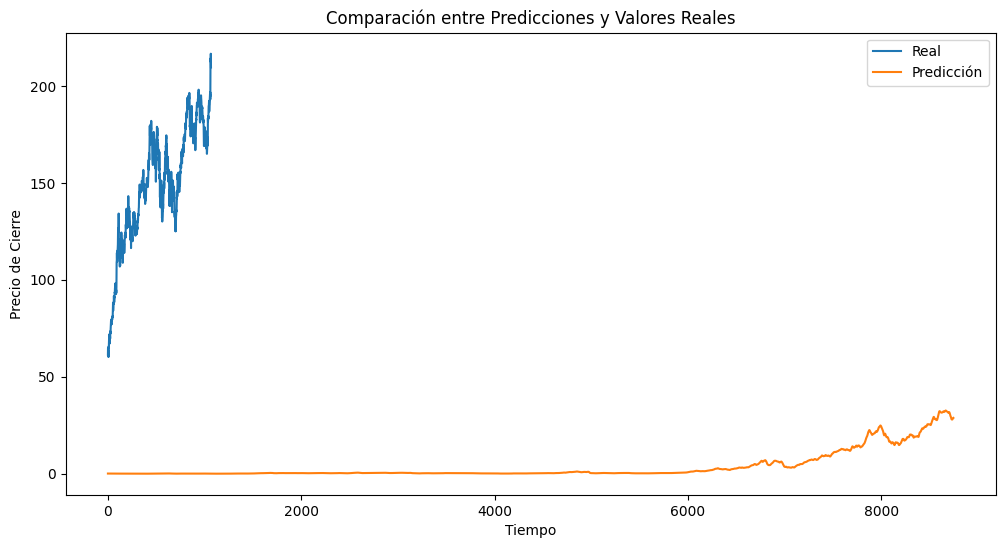

ValueError: operands could not be broadcast together with shapes (1067,) (8746,) 

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# Construcción del modelo RNN con capas LSTM adicionales
N_UNITS = 32  # Tamaño del estado oculto y de la celda de memoria
INPUT_SHAPE = (data_s['x_tr_s'].shape[1], data_s['x_tr_s'].shape[2])  # Dimensiones del input

modelo = Sequential()

# Primera capa LSTM

modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE, return_sequences=True))

# Segunda capa LSTM (capa oculta adicional)
modelo.add(LSTM(N_UNITS))

# Capa de salida
modelo.add(Dense(OUTPUT_LENGTH, activation='linear'))

# Definir la pérdida (RMSE) y el optimizador
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(optimizer=optimizador, loss=root_mean_squared_error)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
EPOCHS = 80  # Hiperparámetro
BATCH_SIZE = 256  # Hiperparámetro

historia = modelo.fit(
    x=data_s['x_tr_s'],
    y=data_s['y_tr_s'],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(data_s['x_vl_s'], data_s['y_vl_s']),
    callbacks=[early_stopping],
    verbose=2
)

# Evaluar el modelo
rmse_tr = modelo.evaluate(x=data_s['x_tr_s'], y=data_s['y_tr_s'], verbose=0)
rmse_vl = modelo.evaluate(x=data_s['x_vl_s'], y=data_s['y_vl_s'], verbose=0)
rmse_ts = modelo.evaluate(x=data_s['x_ts_s'], y=data_s['y_ts_s'], verbose=0)

# Imprimir resultados
print('Comparativo de Desempeño después de ajustes:')
print(f'  RMSE Train:\t {rmse_tr:.3f}')
print(f'  RMSE Val:\t {rmse_vl:.3f}')
print(f'  RMSE Test:\t {rmse_ts:.3f}')


# Graficar curvas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(historia.history['loss'], label='RMSE Train')
plt.plot(historia.history['val_loss'], label='RMSE Val')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('Curvas de Entrenamiento y Validación')
plt.show()



# Función para predecir y desescalar las predicciones
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes de tiempo a futuro con el modelo entrenado.'''
    y_pred_s = model.predict(x, verbose=0)
    y_pred = scaler.inverse_transform(y_pred_s)
    return y_pred.flatten()

# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_tr_s, modelo, scaler)

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_ts.flatten(), label='Real')
plt.plot(y_ts_pred, label='Predicción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.title('Comparación entre Predicciones y Valores Reales')
plt.show()

# Calcular y visualizar los errores
errores = y_ts.flatten() - y_ts_pred
plt.figure(figsize=(12, 6))
plt.plot(errores, label='Errores')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.title('Errores de Predicción')
plt.show()
